In [1]:
import torch
from torch.autograd import Variable

In [2]:
import numpy as np

In [7]:
c = [[1,2], [3,4]]
tensor = torch.FloatTensor(c)
tensor2 = torch.from_numpy(np.array(c))
print(tensor)
print(tensor2)

tensor([[ 1.,  2.],
        [ 3.,  4.]])
tensor([[ 1,  2],
        [ 3,  4]], dtype=torch.int32)


In [8]:
variable = Variable(tensor, requires_grad = True)
variable

tensor([[ 1.,  2.],
        [ 3.,  4.]])

In [11]:
out = torch.mean(variable * variable)
out

tensor(7.5000)

In [12]:
out.backward()

In [21]:
variable.grad

tensor([[ 0.5000,  1.0000],
        [ 1.5000,  2.0000]])

In [22]:
variable.grad.numpy()

array([[ 0.5,  1. ],
       [ 1.5,  2. ]], dtype=float32)

In [3]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [28]:
x = torch.linspace(-5, 5, 200)
x = Variable(x)   #变量只能接收tensor 需要转变一下
x_np = x.numpy()  #torch转变成numpy 画图只能用numpy

In [31]:
y_relu = F.relu(x)
y_relu

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
      

In [46]:
torch.linspace(-1, 1, 100).reshape(1, 100).shape

torch.Size([1, 180])

In [50]:
torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).shape  #插入维度 对于这个张量和reshape一样

torch.Size([180, 1])

In [56]:
x = torch.linspace(-1, 1, 100)  #torch 只会处理二维张量
y = x.pow(2) + 0.2 * torch.rand(x.shape)

In [57]:
y.shape

torch.Size([180])

In [108]:
x = torch.linspace(-1, 1, 100).reshape(100, 1)  #torch 只会处理二维张量
y = x.pow(2) + 0.2 * torch.rand(x.shape)

In [109]:
y.shape

torch.Size([100, 1])

In [110]:
x, y = Variable(x), Variable(y) #
type(x)

torch.Tensor

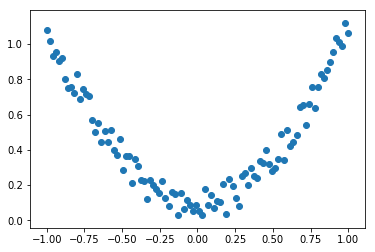

In [111]:
plt.scatter(x, y)
plt.show()

In [112]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):#搭建层需要的信息
        super(Net, self).__init__()  #官方步骤 先调用一些父类的init
        self.hidden = torch.nn.Linear(n_features, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):#nn前向传递的过程
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [113]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [114]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

D:\annoconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


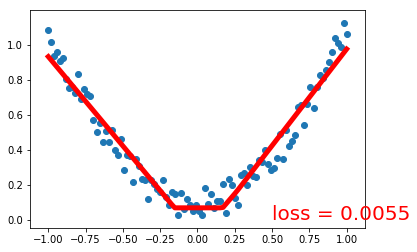

In [115]:
for t in range(100):
    prediction = net(x)
    
    loss = loss_func (prediction, y)
    
    optimizer.zero_grad() # 类似于初始化，把梯度设为0
    loss.backward() #计算出梯度
    optimizer.step() #优化梯度
    
    ###画图过程
    if t % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'loss = %.4f' % loss.data[0], fontdict={'size':20, 'color': 'red'})
        plt.pause(0.1)
plt.ioff()
plt.show()

In [106]:
plt.ion()  #把画图变成实时过程
plt.show()

In [52]:
import torchvision
import matplotlib.pyplot
import torch.utils.data as Data
from torch.autograd import Variable

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../minist", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ../../minist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ../../minist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../../minist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../../minist\t10k-labels-idx1-ubyte.gz


In [21]:
train_data = mnist.train.images.reshape(-1, 28, 28)
train_label = mnist.train.labels
test_data = mnist.test.images.reshape(-1, 28, 28)
test_label = mnist.test.labels

In [22]:
print(train_label.shape)
train_data.shape

(55000, 10)


(55000, 28, 28)

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


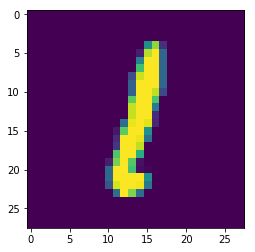

In [20]:
plt.imshow(train_data[6])
print(train_label[6])
plt.show()

In [90]:
class Net1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Sequential(
                    torch.nn.Conv2d(1, 16, 5, 1, padding=2),
                    torch.nn.ReLU(),
                    torch.nn.MaxPool2d(2))
        self.conv2 = torch.nn.Sequential(
                    torch.nn.Conv2d(16, 32, 5, 1, 2),
                    torch.nn.ReLU(),
                    torch.nn.MaxPool2d(2))
        self.out = torch.nn.Linear(32*7*7, 10) 
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.reshape(x.shape[0], -1)
        output = self.out(x)
        return output

In [91]:
net1 = Net1()

In [92]:
print(net1)

Net1(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [165]:
opt = torch.optim.Adam(net1.parameters())
loss_func = torch.nn.CrossEntropyLoss()

In [167]:
loss_func

CrossEntropyLoss()

In [66]:
for i in net1.parameters(): #生成器  网络所有参数
    print(i.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([10, 1568])
torch.Size([10])


In [152]:
batch_size = 100
epochs = 1

In [180]:
mnist.test.images.shape

(10000, 784)

In [185]:
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]
print(test_x.shape)
test_y = np.argmax(test_y, 1)
test_x = torch.FloatTensor(test_x).reshape(-1, 1, 28, 28)
test_y = torch.FloatTensor(test_y)
test_x = test_x.float()
test_y = test_y.long()
test_x.shape

(2000, 784)


torch.Size([2000, 1, 28, 28])

In [188]:
for epoch in range(epochs):
    for step in range(mnist.train.num_examples // batch_size):
        x, y = mnist.train.next_batch(batch_size)
        y = np.argmax(y, 1)
        x = torch.FloatTensor(x).reshape(-1, 1, 28, 28)
        y = torch.FloatTensor(y)
        x = x.float()
        y = y.long()
#         print(step)
#         y.type_as(output)
#         x.type_as(output)
        x = Variable(x)
        y = Variable(y)
        output = net1(x)
       
        loss = loss_func(output, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        if step % 100 == 0:
            test_output= net1(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze() #torch.max会返回元组 值和索引
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))  #.sum()返回tensor .item()得到数字
               #float和 item一样
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.2f' % accuracy)

D:\annoconda\lib\site-packages\ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch:  0 | train loss: 0.0205 | test accuracy: 0.98
Epoch:  0 | train loss: 0.1171 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0232 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0805 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0705 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0311 | test accuracy: 0.98


In [190]:
test_output.shape

torch.Size([2000, 10])

In [192]:
torch.max(test_output, 1)

(tensor([ 12.7940,  13.0944,   6.1254,  ...,  12.1313,   6.8519,
           9.5343]), tensor([ 7,  2,  1,  ...,  3,  9,  5]))

In [197]:
a = torch.randint(high = 3, size=(3,3))
a

tensor([[ 1.,  2.,  0.],
        [ 0.,  1.,  2.],
        [ 2.,  1.,  1.]])

In [212]:
print(a.sum())
print(a.sum().item()) 
print(float(a.sum()))

tensor(10.)
10.0
10.0


In [207]:
a.max(1)[1].data.squeeze()

tensor([ 1,  2,  0])

In [100]:
x, y = mnist.train.next_batch(batch_size)
x = torch.FloatTensor(x).reshape(-1, 1, 28, 28)
y = np.argmax(y,axis=1)
y = torch.FloatTensor(y)
x = Variable(x)
print(x.shape)
y = Variable(y)
print(y.shape)
ret = net1(x)
print(ret[0])

torch.Size([100, 1, 28, 28])
torch.Size([100])
tensor([ 0.1094, -0.0213,  0.1038,  0.1033,  0.1284, -0.0110, -0.0590,
         0.0343,  0.0470,  0.0996])


In [160]:
type(x)

torch.Tensor

In [161]:
type(torch.zeros(2,2))

torch.Tensor

In [173]:
x.type()

'torch.FloatTensor'

In [2]:
import torchvision.models

In [6]:
torchvision.models.resnet50()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F